In [41]:
import pandas as pd
import numpy as npp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./datasets/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#getting info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
#checkig null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

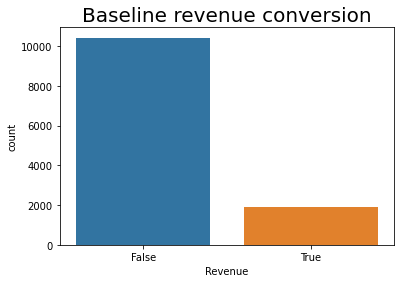

In [5]:
#exploratory data analysis
#univariate analysis
sns.countplot(df['Revenue'])
plt.title("Baseline revenue conversion", fontsize= 20)
plt.show()

In [6]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


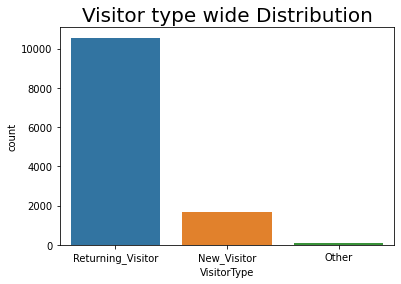

In [7]:
#visitor wide distribution
sns.countplot(df['VisitorType'])
plt.title("Visitor type wide Distribution", fontsize=20)
plt.show()

In [8]:
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


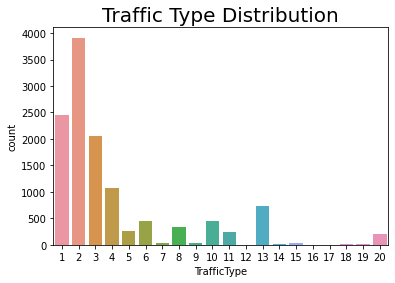

In [9]:
#traffic-wise distribution
sns.countplot(df['TrafficType'])
plt.title('Traffic Type Distribution', fontsize=20)
plt.show()

In [10]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


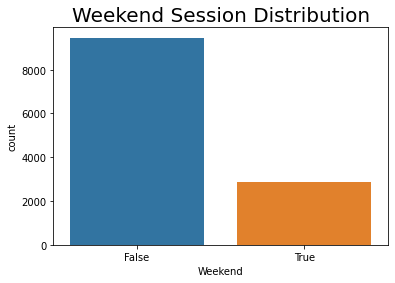

In [11]:
#Analyzing the distribution of custormers session on the website
sns.countplot(df['Weekend'])
plt.title('Weekend Session Distribution', fontsize=20)
plt.show()

In [12]:
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


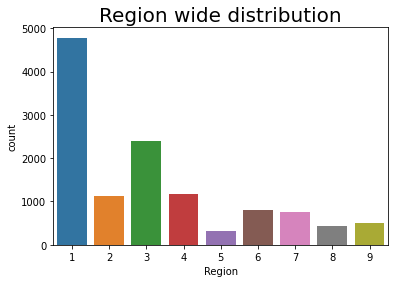

In [13]:
#region
sns.countplot(df['Region'])
plt.title("Region wide distribution", fontsize= 20)
plt.show()

In [14]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


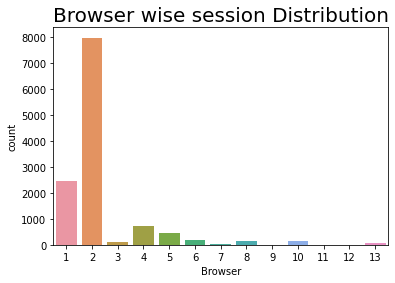

In [15]:
#Analyzing the browser and os distribution of customers
sns.countplot(df['Browser'])
plt.title('Browser wise session Distribution', fontsize=20)
plt.show()

In [16]:
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


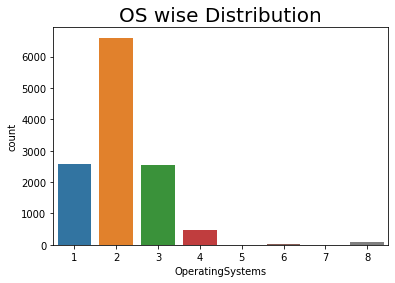

In [18]:
sns.countplot(df['OperatingSystems'])
plt.title('OS wise Distribution', fontsize = 20)
plt.show()

In [19]:
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


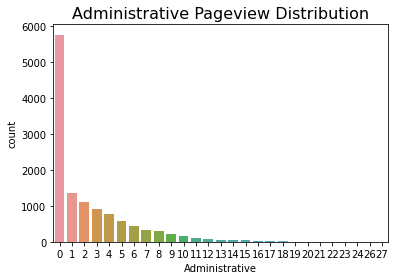

In [22]:
#Administrative pageview Distribution
sns.countplot(df['Administrative'])
plt.title("Administrative Pageview Distribution", fontsize= 16)
plt.show()

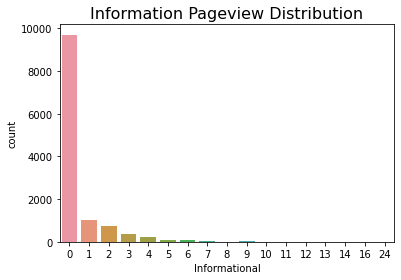

In [23]:
#infromation pageview distribution
sns.countplot(df['Informational'])
plt.title('Information Pageview Distribution', fontsize=16)
plt.show()

In [24]:
print(df['Informational'].value_counts(normalize=True))

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


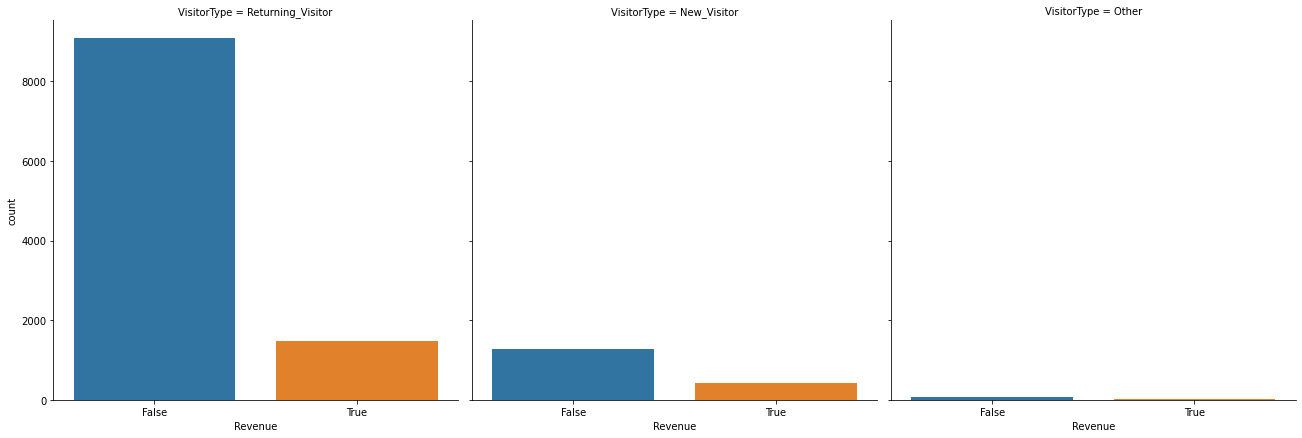

In [25]:
#Bivariate analysis
#Revenue vs Visitor type
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3, data=df, kind='count', height=6, aspect=1)
plt.show()

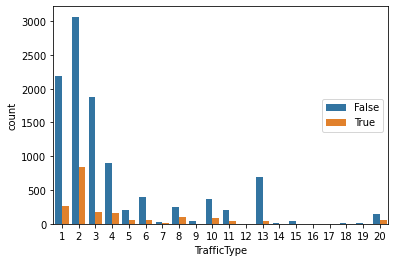

In [28]:
#Revenue vs traffic type
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

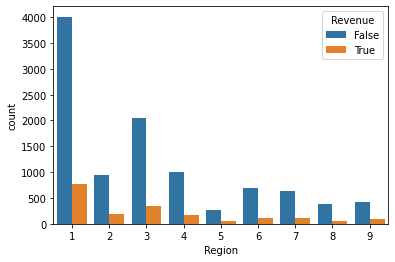

In [29]:
#analyzing the relationship between revenue and other variables
sns.countplot(data=df, x='Region', hue="Revenue")
plt.show()

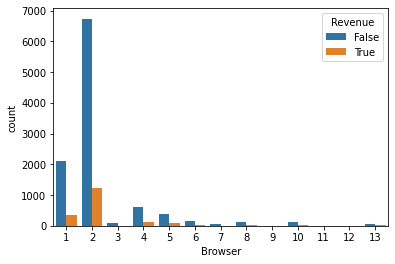

In [30]:
sns.countplot(data=df, x="Browser", hue="Revenue")
plt.show()

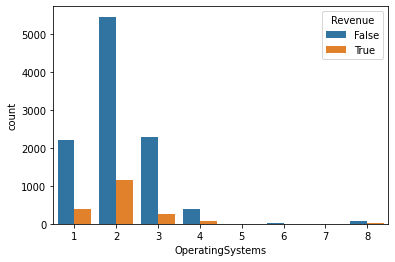

In [31]:
sns.countplot(data=df,x="OperatingSystems", hue="Revenue")
plt.show()

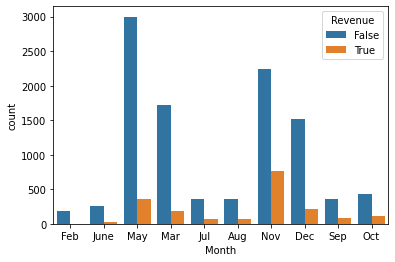

In [32]:
sns.countplot(x="Month", hue="Revenue", data=df, order={'Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'})
plt.show()

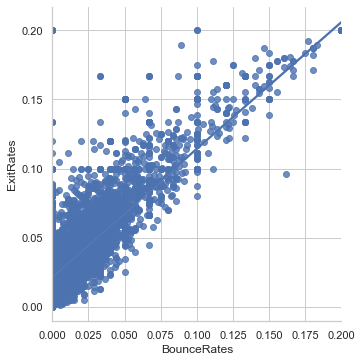

In [33]:
#Linear Relationship
#Bounce Rate Vs Exit rate
sns.set(style='whitegrid')
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

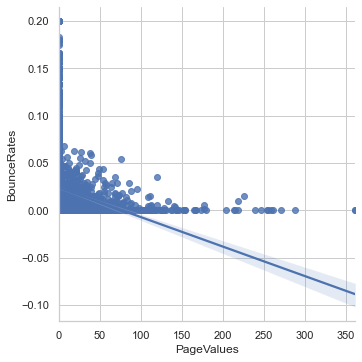

In [36]:
#page values Vs Bounce rate
sns.set(style="whitegrid")
ax = sns.lmplot(data=df, x="PageValues", y="BounceRates")

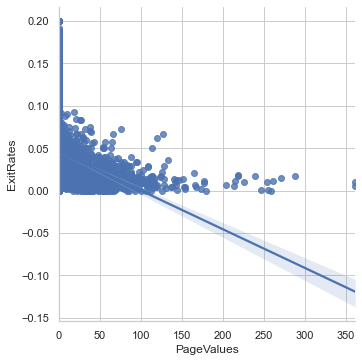

In [37]:
#page values vs exit rate
sns.set(style="whitegrid")
ax = sns.lmplot(data=df, x="PageValues", y='ExitRates')

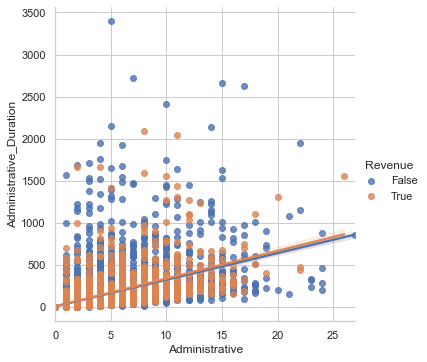

In [38]:
#Impact of administration page views and adminsstrative page view duration on revenue
sns.set(style="whitegrid")
ax = sns.lmplot(data=df, x="Administrative", y="Administrative_Duration", hue='Revenue')

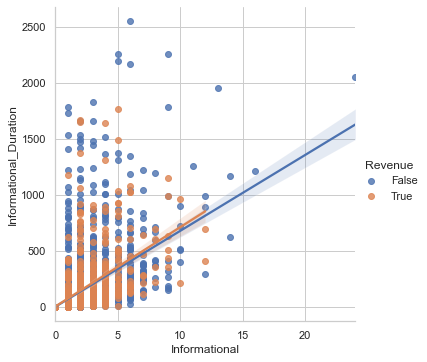

In [39]:
#Impact of Page views and infromation pageview duration on revenue
sns.set(style='whitegrid')
ax = sns.lmplot(data=df, x="Informational", y="Informational_Duration", hue='Revenue')

In [40]:
#Clustering
#perform k-mean clustering for informational duration vs Bounce rate
x = df.iloc[:, [3, 6]].values

In [42]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', max_iter= 300, n_init= 10, random_state=0, algorithm='elkan', tol= 0.001)

In [43]:
km.fit(x)
labels = km.labels_

In [44]:
wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
km = KMeans(n_clusters=2, init= 'k-means++', max_iter=300, n_init= 10, random_state=0)
y_means = km.fit_predict(x)

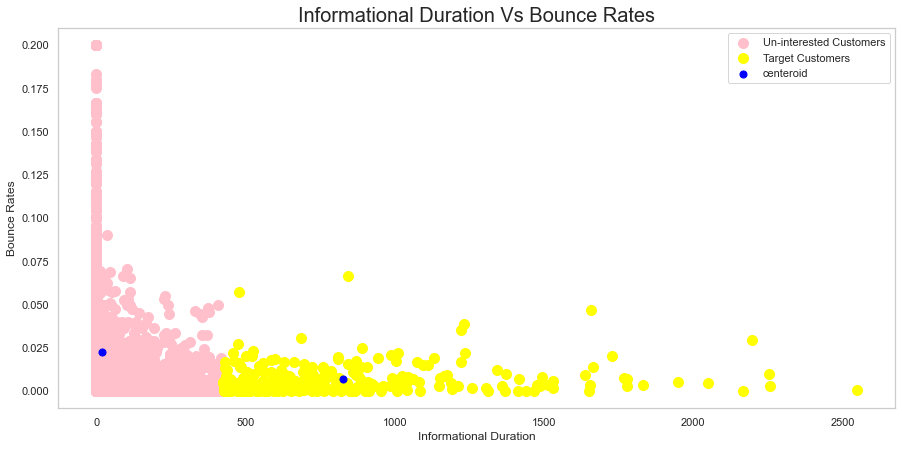

In [54]:
#plot the scatter plot
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label= 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c ='yellow', label='Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c='blue', label='centeroid')
plt.title('Informational Duration Vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel("Informational Duration")
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [55]:
#So to conclude, target customers spend around 850-900 sec on average on the information page

In [56]:
#Performing K-means clustering for informational duration vs exit rate
x = df.iloc[:, [4, 7]].values
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0, algorithm='elkan', tol= 0.001)

km.fit(x)
labels = km.labels_
wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

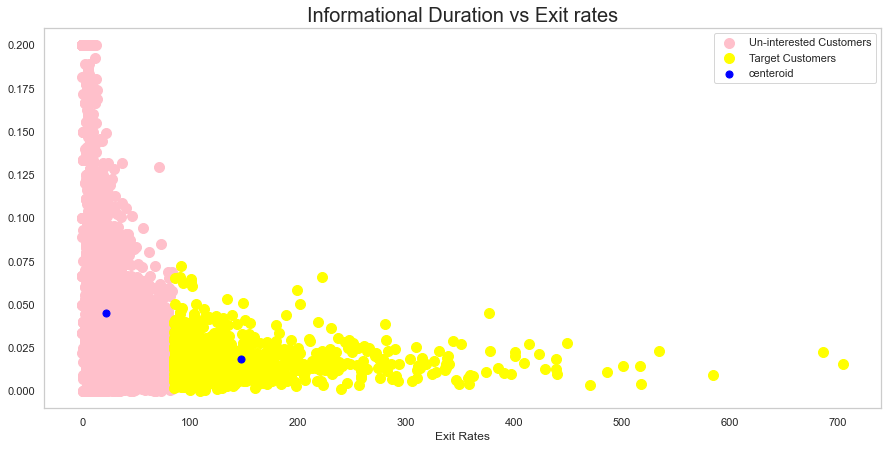

In [61]:
#so optimum val is 2
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c='pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c='blue', label='centeroid')

plt.title('Informational Duration vs Exit rates', fontsize=20)
plt.grid()
plt.xlabel('Exit Rates')
plt.legend()
plt.show()

In [ ]:
#For activity
#Performing k-means clusstering for administrative duration vs bounce rate/